# BANK CUSTOMERS RETIREMENT PREDICTIONS USING SUPPORT VECTOR MACHINES


#  PROBLEM STATEMENT

You work as a data scientist at a major bank in NYC and you have been tasked to develop a model that can predict whether a customer is able to retire or not based on his/her features. Features are his/her age and net 401K savings (retirement savings in the U.S.). You though that Support Vector Machines can be a great candidate to solve the problem. 

# IMPORTING DATA

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Bank_Customer_retirement.csv')

In [4]:
df

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1
...,...,...,...,...
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1


In [5]:
df.keys()

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

In [6]:
df.shape

(500, 4)

In [7]:
df.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [8]:
df.tail()

,Customer ID,Age,401K Savings,Retire
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1
499,499,38.590586,491310.0096,0


#  VISUALIZING THE DATA

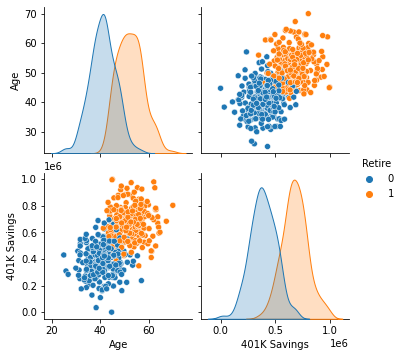

In [9]:
sns.pairplot(df,hue = 'Retire',vars = ['Age','401K Savings'])

C:\Users\dELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Retire', ylabel='count'>

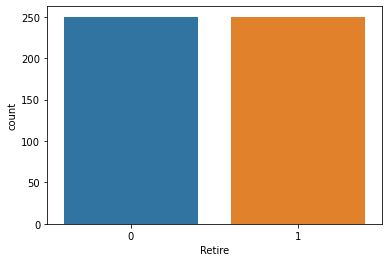

In [10]:
sns.countplot(df['Retire'],label = 'Retirement')

# MODEL TRAINING 

In [11]:
df = df.drop(['Customer ID'],axis = 1)

In [12]:
df

,Age,401K Savings,Retire
0,39.180417,322349.8740,0
1,56.101686,768671.5740,1
2,57.023043,821505.4718,1
3,43.711358,494187.4850,0
4,54.728823,691435.7723,1
...,...,...,...
495,46.678128,704243.0776,1
496,43.545007,483175.9998,0
497,46.476724,354919.1987,0
498,50.903631,639789.9219,1


In [13]:

# Let's drop the target label coloumns
X = df.drop(['Retire'],axis = 1)

In [14]:
X

,Age,401K Savings
0,39.180417,322349.8740
1,56.101686,768671.5740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723
...,...,...
495,46.678128,704243.0776
496,43.545007,483175.9998
497,46.476724,354919.1987
498,50.903631,639789.9219


In [15]:
y = df['Retire']
y

0      0
1      1
2      1
3      0
4      1
      ..
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64

In [16]:
y.shape

(500,)

In [17]:
X.shape

(500, 2)

In [18]:
from sklearn.model_selection import train_test_split
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state= 5)

In [19]:
X_train

,Age,401K Savings
247,45.678369,684863.43130
390,55.964798,651645.84440
186,51.919344,669914.75200
484,48.053812,718014.22440
139,44.282504,363802.71420
...,...,...
486,38.351127,33837.93215
189,36.903693,374397.16500
495,46.678128,704243.07760
206,46.599362,626794.87610


In [20]:
X_train.shape

(400, 2)

In [21]:
X_test.shape

(100, 2)

In [22]:
y_train.shape

(400,)

In [23]:
y_test.shape

(100,)

In [24]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [25]:
from sklearn.metrics import accuracy_score,classification_report , confusion_matrix

#  EVALUATING THE MODEL

In [26]:
y_pred = model.predict(X_test) 

<AxesSubplot:>

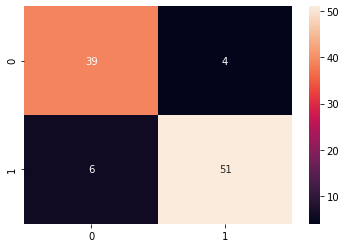

In [27]:
cm = confusion_matrix(y_test,y_pred)
cm
sns.heatmap(cm, annot=True)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        43
           1       0.93      0.89      0.91        57

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [29]:
print(accuracy_score(y_test,y_pred))

0.9


#  IMPROVING THE MODEL

using other scaling method

In [30]:
min_train = X_train.min()
range_train = (X_train - min_train).max()
X_train_scaled = (X_train-min_train)/range_train

In [31]:
min_train

Age             25.0
401K Savings    10.0
dtype: float64

In [32]:
range_train


Age                 42.318208
401K Savings    999990.000000
dtype: float64

In [33]:
X_train_scaled

,Age,401K Savings
247,0.488640,0.684860
390,0.731713,0.651642
186,0.636117,0.669911
484,0.544773,0.718011
139,0.455655,0.363796
...,...,...
486,0.315494,0.033828
189,0.281290,0.374391
495,0.512265,0.704240
206,0.510404,0.626791


In [34]:
y_train

247    1
390    1
186    1
484    1
139    0
      ..
486    0
189    0
495    1
206    1
355    0
Name: Retire, Length: 400, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='401K Savings'>

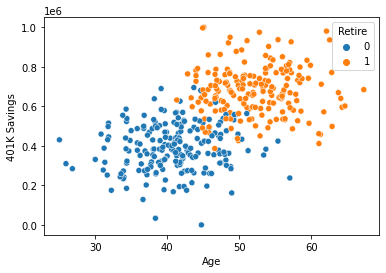

In [35]:
sns.scatterplot(x=X_train['Age'],y=X_train['401K Savings'],data=df,hue = 'Retire')

<AxesSubplot:xlabel='Age', ylabel='401K Savings'>

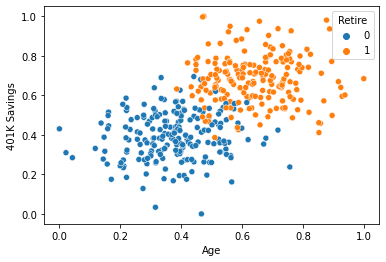

In [36]:
sns.scatterplot(x=X_train_scaled['Age'],y=X_train_scaled['401K Savings'],data=df,hue = 'Retire')

In [37]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test-min_test)/range_test
X_test_scaled

,Age,401K Savings
241,0.267183,0.094430
448,0.165409,0.505061
75,0.139272,0.302988
212,0.248950,0.550203
481,0.323557,0.677682
...,...,...
145,0.633436,0.635622
234,0.612141,0.525418
382,0.444550,0.850610
141,0.538401,0.412874


In [38]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train_scaled,y_train)

SVC()

In [39]:
y_pred1 = model.predict(X_test_scaled)

<AxesSubplot:>

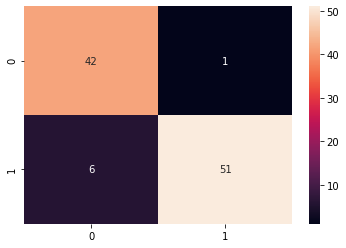

In [40]:
cm = confusion_matrix(y_test,y_pred1)
sns.heatmap(cm,annot=True)

In [41]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.89      0.94        57

    accuracy                           0.93       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100



In [42]:
print(accuracy_score(y_test,y_pred1))

0.93


In [43]:
#Using SC for scaling

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1=sc.fit_transform(X_train)
X_test1=sc.transform(X_test)


In [45]:
model.fit(X_train1,y_train)

SVC()

In [46]:
y_pred2 = model.predict(X_test1)

<AxesSubplot:>

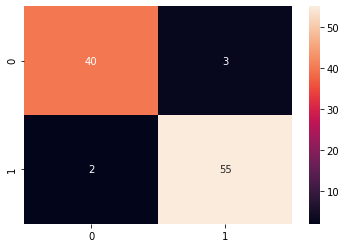

In [47]:
cm = confusion_matrix(y_test,y_pred2)
sns.heatmap(cm,annot=True)

In [48]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.95      0.96      0.96        57

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [49]:
print(accuracy_score(y_test,y_pred2))

0.95


In [50]:
#Using minmax for scaling


In [51]:
from sklearn.preprocessing import MinMaxScaler
scc = MinMaxScaler()
X_train2=scc.fit_transform(X_train)
X_test2=scc.transform(X_test)

In [52]:
model.fit(X_train2,y_train)

SVC()

In [53]:
y_pred3 = model.predict(X_test2)

<AxesSubplot:>

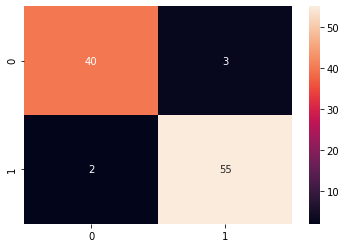

In [54]:
cm = confusion_matrix(y_test,y_pred3)
sns.heatmap(cm,annot=True)

In [55]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.95      0.96      0.96        57

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [56]:
print(accuracy_score(y_test,y_pred3))

0.95


before scaling data ---> accuracy = 48% <br>
after using 3 types of scaling <br> 
1 ---> other type ---> accuracy = 93% <br>
2 ---> Standard Scalar ---> accuracy = 95% <br>
3 ---> Min MAX Scalar ---> accuracy = 95% 

# IMPROVING THE MODEL using C and Gamma

In [57]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
grid = GridSearchCV(SVC(), param_grid, refit=True ,verbose=4)

In [60]:
grid.fit(X_train1,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [61]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [62]:
grid_predict = grid.predict(X_test1)

<AxesSubplot:>

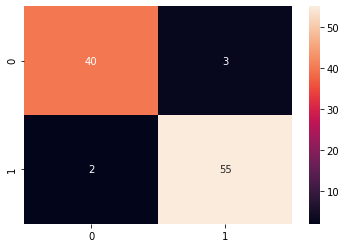

In [63]:
cm = confusion_matrix(y_test,grid_predict)
sns.heatmap(cm,annot=True)

In [64]:
print(classification_report(y_test,grid_predict))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.95      0.96      0.96        57

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



# SVM Model is used to predict this classification and improved upto 95% accuracy
